# Time Series Forecasting of Stock Market Data with ARIMA in Python



In [1]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
date.today()

datetime.date(2024, 3, 11)

In [4]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2023-03-12 2024-03-11


In [5]:
# deifne the ticker
ticker = 'ADANIENT.NS'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,1917.000000,1985.000000,1857.400024,1874.400024,1873.463989,7572604
2023-03-14,1874.000000,1874.849976,1651.349976,1738.199951,1737.331909,12679663
2023-03-15,1760.900024,1891.449951,1728.099976,1839.000000,1838.081665,12296703
2023-03-16,1861.000000,1875.000000,1795.000000,1843.800049,1842.879272,6509495
2023-03-17,1901.000000,1918.849976,1845.000000,1876.550049,1875.612915,5969594


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2023-03-13 to 2024-03-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB


In [7]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,1917.000000,1985.000000,1857.400024,1874.400024,1873.463989,7572604
1,2023-03-14,1874.000000,1874.849976,1651.349976,1738.199951,1737.331909,12679663
2,2023-03-15,1760.900024,1891.449951,1728.099976,1839.000000,1838.081665,12296703
3,2023-03-16,1861.000000,1875.000000,1795.000000,1843.800049,1842.879272,6509495
4,2023-03-17,1901.000000,1918.849976,1845.000000,1876.550049,1875.612915,5969594


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,244,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,2023-09-09 19:22:37.377049088,2490.289136,2529.172328,2446.603084,2483.384224,2483.050453,4.096755e+06
min,2023-03-13 00:00:00,1602.949951,1733.000000,1573.000000,1600.849976,1600.050537,6.415540e+05
25%,2023-06-12 18:00:00,2248.500000,2293.212463,2211.525024,2233.500061,2233.121216,1.686652e+06
50%,2023-09-07 12:00:00,2467.525024,2500.199951,2428.000000,2464.049927,2464.049927,2.666704e+06
75%,2023-12-08 18:00:00,2818.724976,2873.950073,2772.499939,2812.962402,2812.962402,4.954377e+06
max,2024-03-07 00:00:00,3339.000000,3350.000000,3310.050049,3327.750000,3327.750000,2.843289e+07
std,NaN,428.782998,430.794316,425.765424,427.531241,427.804287,4.373276e+06


In [10]:
# make a plot on plotly
fig = px.line(df, x='Date', y="Close", title='Stock Price')
fig.show()

In [11]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-03-13,1874.400024
1,2023-03-14,1738.199951
2,2023-03-15,1839.000000
3,2023-03-16,1843.800049
4,2023-03-17,1876.550049


In [12]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

#

In [13]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -0.991511
p-value: 0.756348
Fail to reject the null hypothesis. Data is not stationary


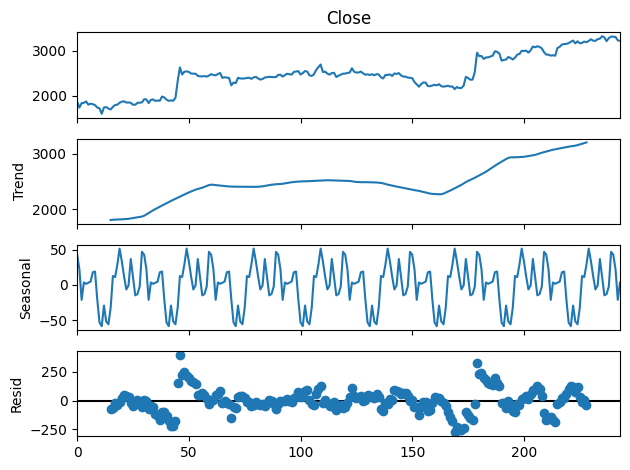

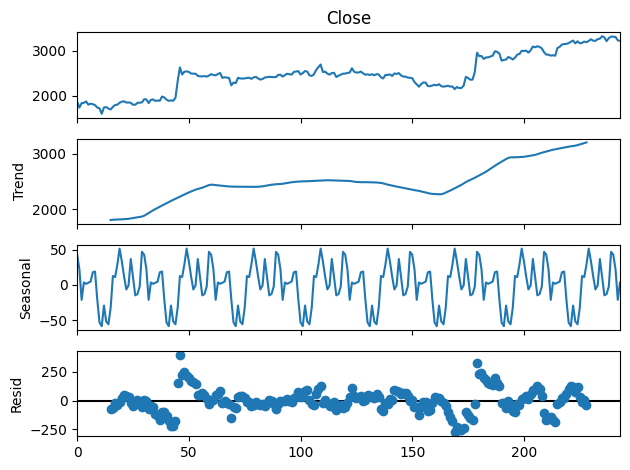

In [14]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

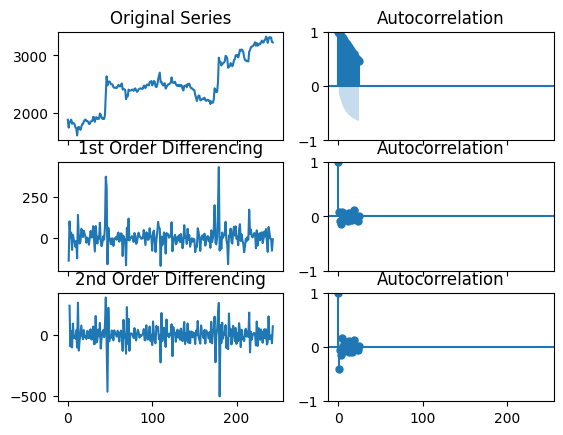

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [16]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.978047
2   0.952223
3   0.928079
4   0.906923
5   0.884017
6   0.860276
7   0.837730
8   0.814454
9   0.789364
10  0.765673
11  0.742920
12  0.720816
13  0.699007
14  0.677273
15  0.654529
16  0.631133
17  0.609543
18  0.588741
19  0.565227
20  0.540864
21  0.518026
22  0.494874
23  0.472922


`p = 2`

# Lets find `q` value

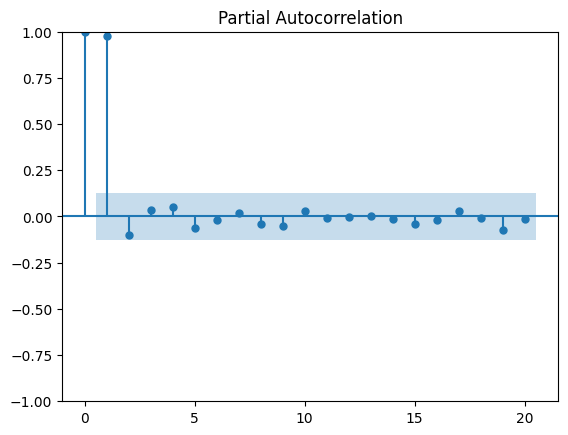

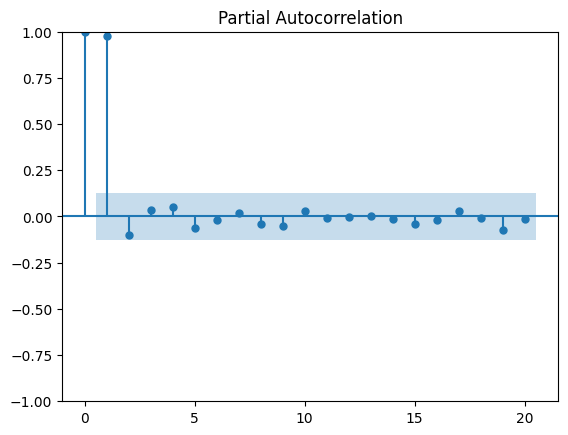

In [17]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [18]:
# lets define p, d, q
p = 2
d = 1
q = 2

In [19]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2620.812, Time=1.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2730.206, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2680.061, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2618.838, Time=1.42 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2726.543, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2620.817, Time=1.75 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2620.813, Time=1.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2679.693, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.97 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2618.408, Time=0.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2620.404, Time=0.38 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=2620.403, Time=0.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2681.403, Time=0.11 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.54 sec
 ARIMA(1,1,0)(0,1,1)[12]     

In [20]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  244
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -1307.204
Date:                              Mon, 11 Mar 2024   AIC                           2618.408
Time:                                      15:07:18   BIC                           2625.293
Sample:                                           0   HQIC                          2621.185
                                              - 244                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8724      0.050    -17.380      0.000      -0.971      -0.774
sigma2      4468.54

In [21]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1353.742
Date:                Mon, 11 Mar 2024   AIC                           2717.484
Time:                        15:07:27   BIC                           2734.949
Sample:                             0   HQIC                          2724.519
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3811      0.067     -5.665      0.000      -0.513      -0.249
ar.L2         -0.8694      0.045    -19.136      0.000      -0.958      -0.780
ma.L1          0.4908      0.065      7.538      0.0

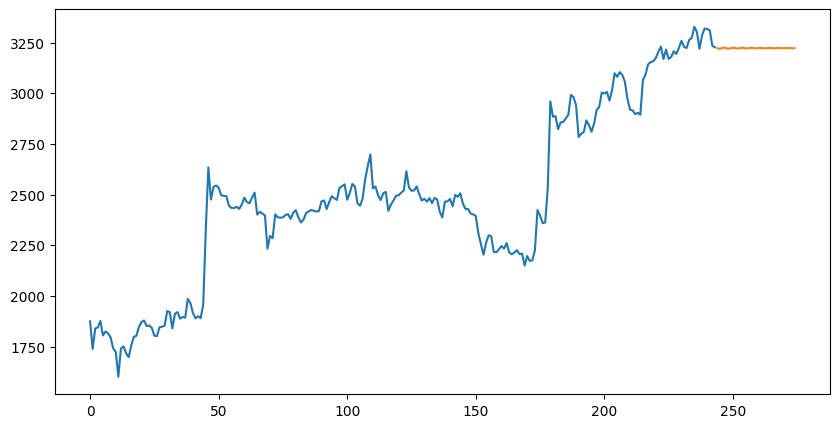

In [22]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [23]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\Users\ASUS\TimeSeries\Timeseries\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  244
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1304.218
Date:                            Mon, 11 Mar 2024   AIC                           2626.436
Time:                                    15:07:34   BIC                           2657.418
Sample:                                         0   HQIC                          2638.932
                                            - 244                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4098      0.019    -21.207      0.000      -0.448      -0.372
ar.L2         -0.9975      0.006   

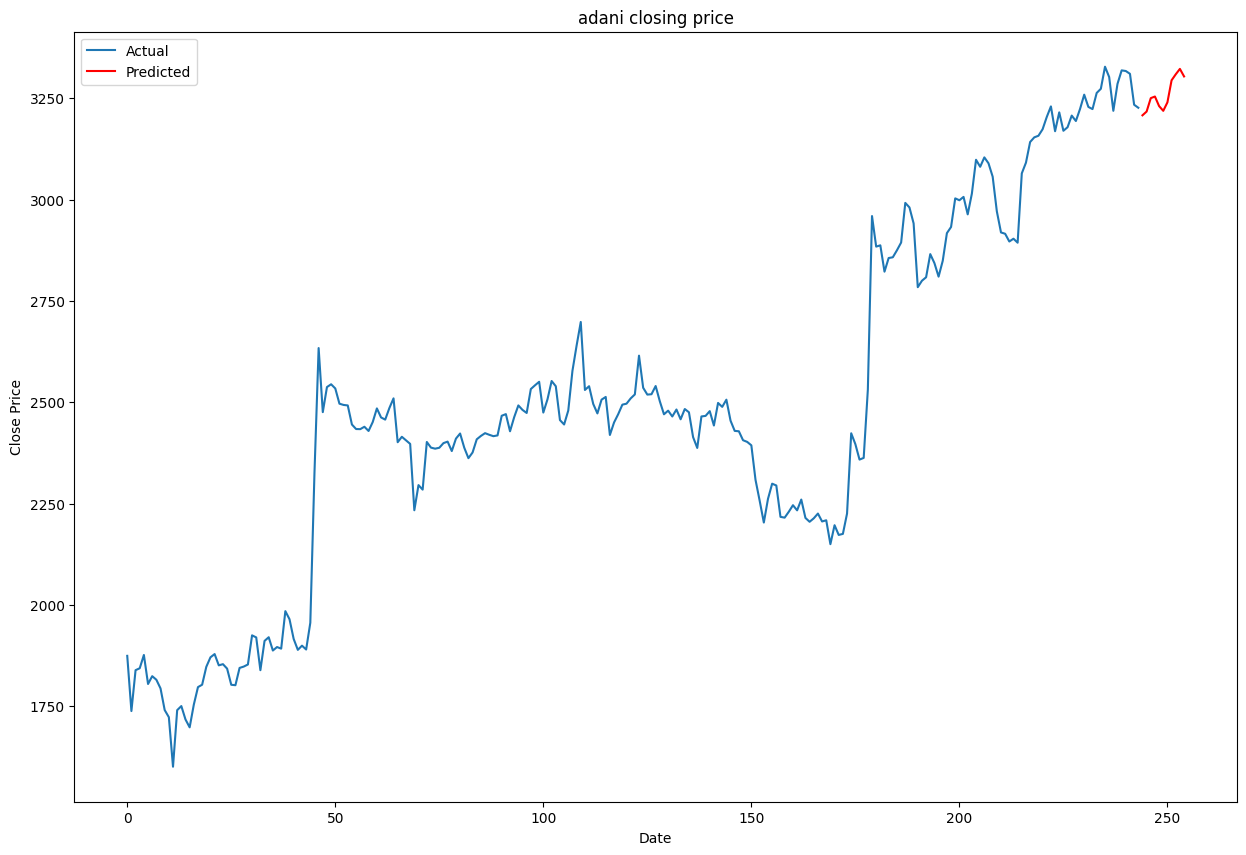

In [24]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('adani closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


c:\Users\ASUS\TimeSeries\Timeseries\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



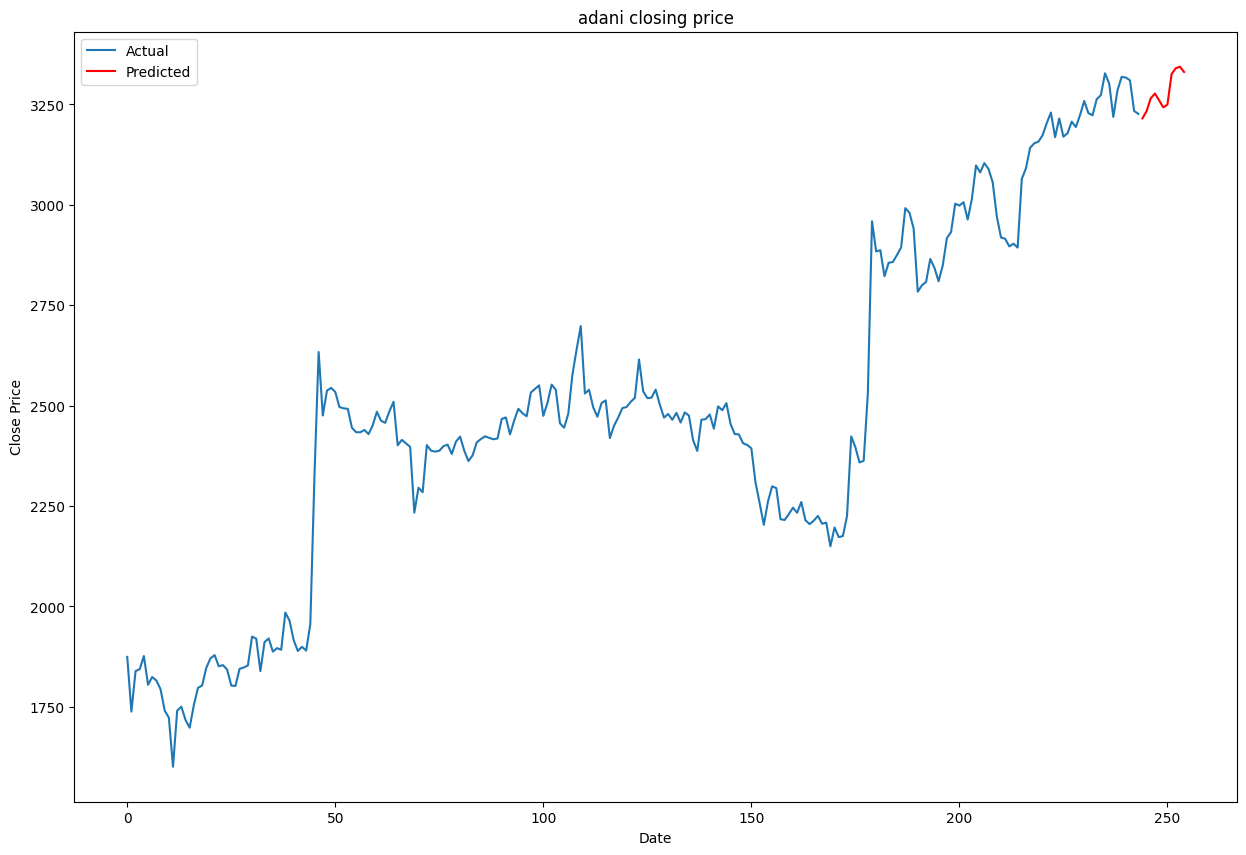

In [25]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('adani closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

c:\Users\ASUS\TimeSeries\Timeseries\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\ASUS\TimeSeries\Timeseries\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:2452.6285579373866


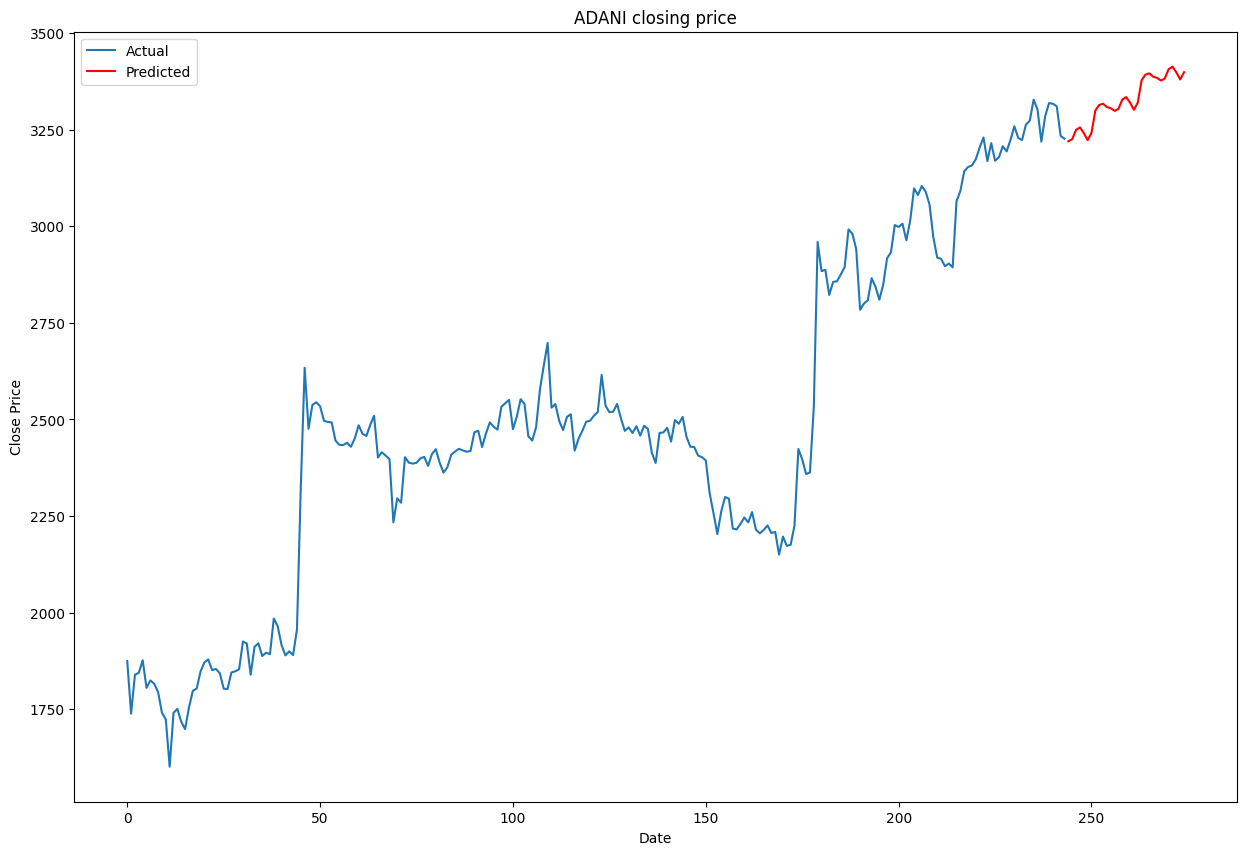

In [26]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ADANI closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  244
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1223.314
Date:                            Mon, 11 Mar 2024   AIC                           2452.629
Time:                                    15:08:12   BIC                           2462.768
Sample:                                         0   HQIC                          2456.725
                                            - 244                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1108      0.044      2.540      0.011       0.025       0.196
ma.S.L12      -0.8651      0.051    -16.914      0.000      -0.965      -0.765
sigma2      4415.4409    209.413     21.085      0.000    4004.999    4825.883
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1014.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             1.54
Prob(H) (two-sided):                  0.59   Kurtosis:                        13.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""